# Table of Contents

1. **Data Description**
   - 1.1 [Introduction](#Introduction)
   - 1.2 [Data Source and Dataset Overview](#Data-Source-and-Dataset-Overview)

2. **Load the Packages and Data**

3. **Data Profiling**
   - 3.1 [Understanding the Dataset](#Understanding-the-Dataset)
   - 3.2 [Pre-Profiling (Initial Overview)](#Pre-Profiling-Initial-Overview)
   - 3.3 [Preprocessing](#Preprocessing)
   - 3.4 [Post-Profiling (After Cleaning)](#Post-Profiling-After-Cleaning)

4. **Exploratory Data Analysis (EDA) Questions**
   - 4.1 [Types of Content on Netflix (Movies vs TV Shows)](#Types-of-Content-on-Netflix-Movies-vs-TV-Shows)
   - 4.2 [Correlation Between Features](#Correlation-Between-Features)
   - 4.3 [Most Watched Shows on Netflix](#Most-Watched-Shows-on-Netflix)
   - 4.4 [Distribution of Ratings](#Distribution-of-Ratings)
   - 4.5 [Which has the Highest Rating: TV Shows or Movies?](#Which-has-the-Highest-Rating-TV-Shows-or-Movies)
   - 4.6 [Best Month for Releasing Content](#Best-Month-for-Releasing-Content)
   - 4.7 [Most Popular Genres on Netflix](#Most-Popular-Genres-on-Netflix)
   - 4.8 [Movies Released Over the Years](#Movies-Released-Over-the-Years)
   - 4.9 [Movies Made on a Yearly Basis](#Movies-Made-on-a-Yearly-Basis)
   - 4.10 [Show ID and Director for 'House of Cards'](#Show-ID-and-Director-for-House-of-Cards)
   - 4.11 [Movies Released in the Year 2000](#Movies-Released-in-the-Year-2000)
   - 4.12 [TV Shows Released in India](#TV-Shows-Released-in-India)
   - 4.13 [Top 10 Directors by Number of TV Shows and Movies](#Top-10-Directors-by-Number-of-TV-Shows-and-Movies)
   - 4.14 [Movies/TV Shows Featuring Tom Cruise](#MoviesTV-Shows-Featuring-Tom-Cruise)
   - 4.15 [Movies with "TV-14" Rating in Canada](#Movies-with-TV-14-Rating-in-Canada)

5. **Conclusions**


## 1.1 Introduction

This project performs an exploratory data analysis (EDA) on the Netflix dataset. The goal is to uncover insights into the types of content available on Netflix, their distribution, and trends over time. This analysis will help us understand the content strategy of Netflix and identify patterns in the data.


## 1.2 Data Source and Dataset Overview

The dataset used in this analysis is sourced from [Kaggle](https://www.kaggle.com/shivamb/netflix-shows) and contains information on Netflix movies and TV shows. The dataset includes the following features:

- **show_id**: Unique ID for every movie/show.
- **type**: Type of content (Movie or TV Show).
- **title**: Title of the movie/show.
- **director**: Director of the movie/show.
- **cast**: Actors involved in the movie/show.
- **country**: Country where the movie/show was produced.
- **date_added**: Date when the movie/show was added to Netflix.
- **release_year**: Release year of the movie/show.
- **rating**: Rating of the movie/show.
- **duration**: Duration of the movie (in minutes) or number of seasons (for TV shows).
- **listed_in**: Genres associated with the movie/show.
- **description**: A brief description of the movie/show.


## 3.1 Understanding the Dataset

Let's explore the basic structure of the dataset to understand its features and identify any immediate issues.


In [19]:
# Load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Set the plotting style
sns.set(style="whitegrid", palette="muted")

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Display the first 5 rows of the dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
# Display basic information about the dataset
df.info()

# Summary statistics for numerical columns
df.describe(include='all')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [20]:
# Summary statistics for numerical columns
df.describe()



,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
# Checking for missing values
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [23]:
# Convert date columns to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Handle duplicates, if any
df= df.drop_duplicates()

4. Exploratory Data Analysis (EDA) Questions


4.1 Types of Content on Netflix (Movies vs TV Shows)


/var/folders/lm/0_g9hsjn3k75qytqhw5s617w0000gn/T/ipykernel_40994/2472212764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


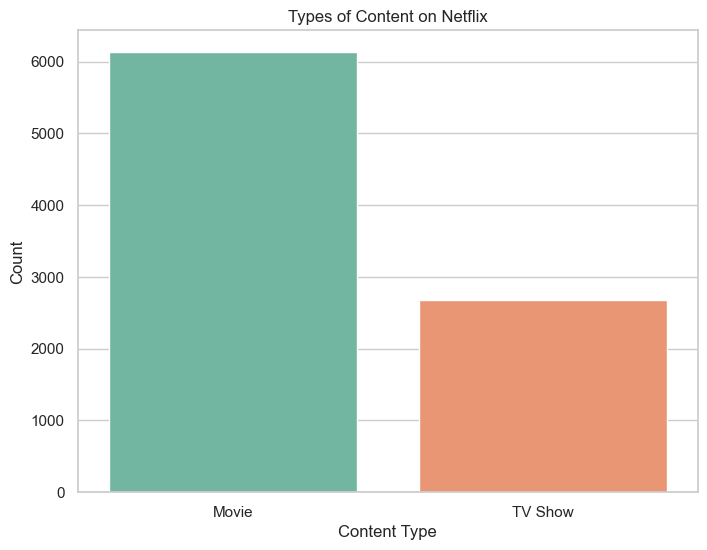

In [24]:
# 4.1 Types of Content on Netflix (Movies vs TV Shows)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Types of Content on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

4.2 Distribution of ratings


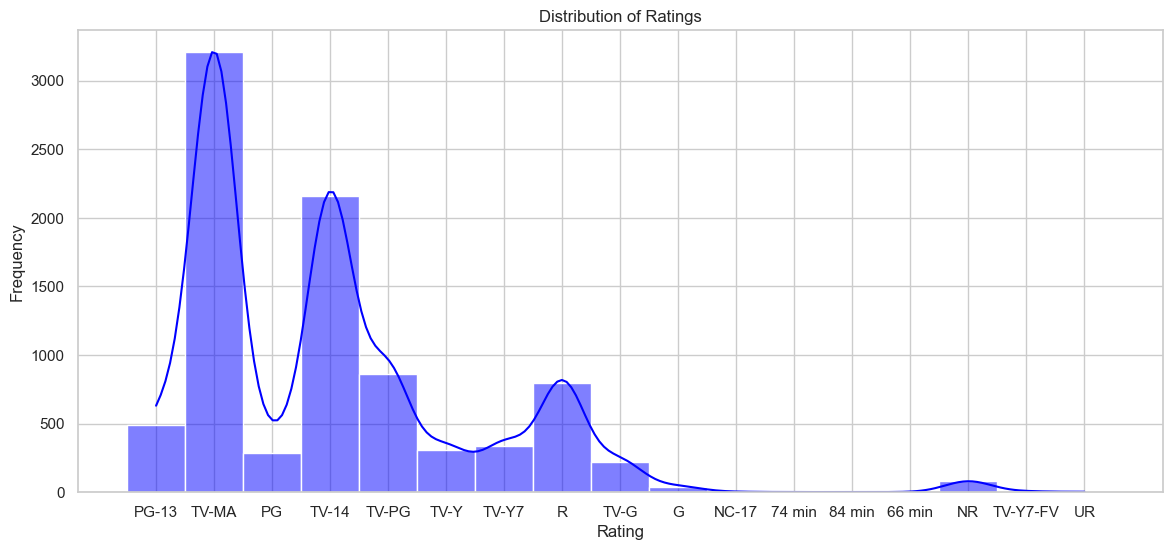

In [27]:
# 4.2 Distribution of Ratings
plt.figure(figsize=(14,6))
sns.histplot(df['rating'].dropna(), kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

4.4 Which has the Highest Rating: TV Shows or Movies?


/Users/gonzo/Desktop/portafolio/netflix_eda/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gonzo/Desktop/portafolio/netflix_eda/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


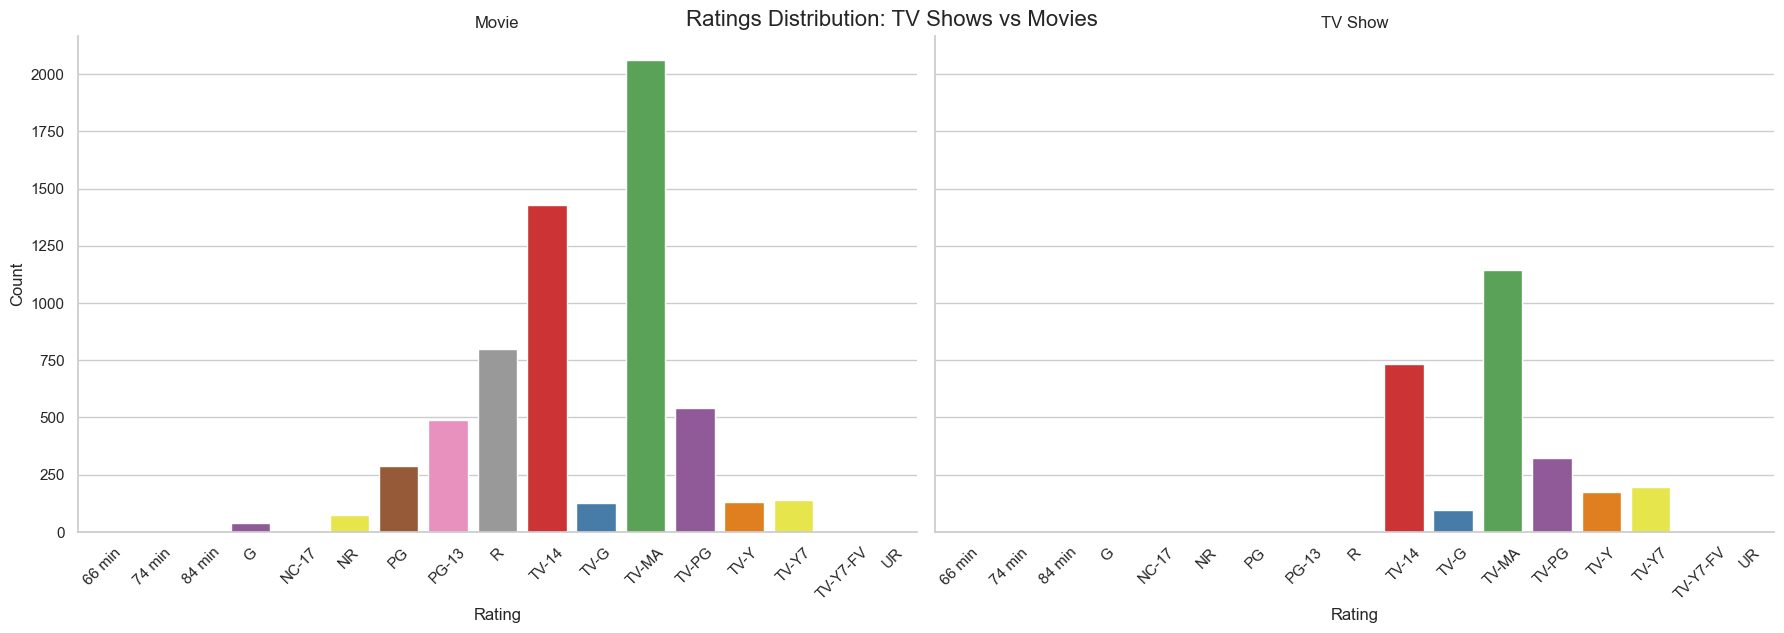

In [42]:
# Facet Grid Bar Plot
unique_ratings = df['rating'].dropna().unique()
g = sns.FacetGrid(df, col="type", height=6, aspect=1.5)
g.map(sns.countplot, "rating", order=sorted(unique_ratings), palette="Set1")
g.set_titles("{col_name}")
g.set_axis_labels("Rating", "Count")
g.fig.suptitle('Ratings Distribution: TV Shows vs Movies', fontsize=16)
g.set_xticklabels(rotation=45)
plt.show()


4.6 Most Popular Genres on Netflix


/var/folders/lm/0_g9hsjn3k75qytqhw5s617w0000gn/T/ipykernel_40994/1306444488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres, order=genres.value_counts().index, palette='magma')


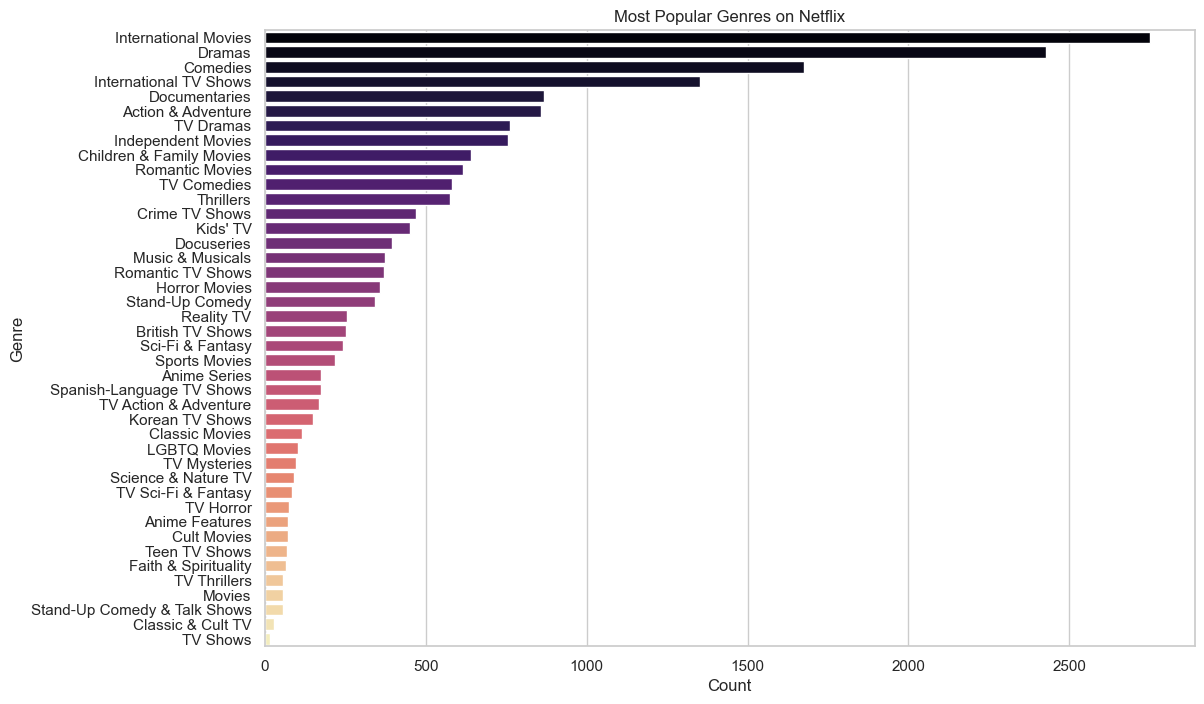

In [43]:
# 4.6 Most Popular Genres on Netflix
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,8))
sns.countplot(y=genres, order=genres.value_counts().index, palette='magma')
plt.title('Most Popular Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
